- 지역별 인구증가율과 고령인구비율 시각화

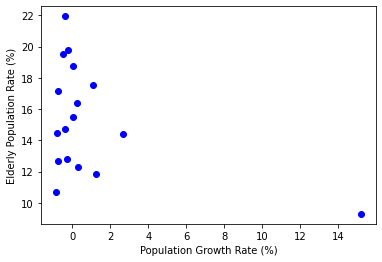

In [5]:
import matplotlib.pyplot as plt
import numpy as np

population_inc = [0.3, -0.78, 1.26, 0.03, 1.11, 15.17, 0.24, -0.24, -0.47, -0.77, -0.37, -0.85, -0.41, -0.27, 0.02, -0.76, 2.66]
population_old = [12.27, 14.44, 11.87, 18.75, 17.52, 9.29, 16.37, 19.78, 19.51, 12.65, 14.74, 10.72, 21.94, 12.83, 15.51, 17.14, 14.42]

plt.plot(population_inc, population_old, 'bo')
plt.xlabel('Population Growth Rate (%)')
plt.ylabel('Elderly Population Rate (%)')
plt.show()

- 극단치 제거
    - 데이터의 일반적 경향 파악

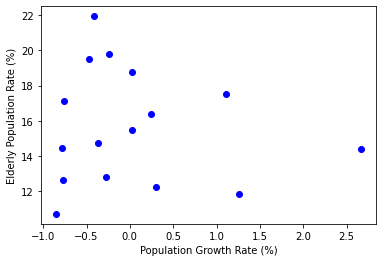

In [6]:
population_inc = [0.3, -0.78, 1.26, 0.03, 1.11, 15.17, 0.24, -0.24, -0.47, -0.77, -0.37, -0.85, -0.41, -0.27, 0.02, -0.76, 2.66]
population_inc = population_inc[:5] + population_inc[6:]

population_old = [12.27, 14.44, 11.87, 18.75, 17.52, 9.29, 16.37, 19.78, 19.51, 12.65, 14.74, 10.72, 21.94, 12.83, 15.51, 17.14, 14.42]
population_old = population_old[:5] + population_old[6:]

plt.plot(population_inc, population_old, 'bo')
plt.xlabel('Population Growth Rate (%)')
plt.ylabel('Elderly Population Rate (%)')
plt.show()

- 선형회귀를 통해 데이터 경향성을 보는 잔차
    - 여기서 최소제곱법(Least Square Method) 이용

$$


$$

a: -0.355834147915461 b: 15.669317743971302


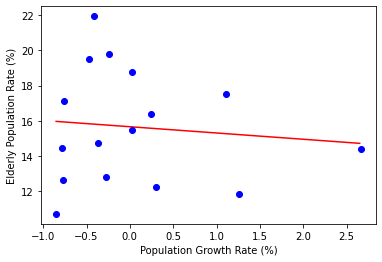

In [9]:
X = [0.3, -0.78, 1.26, 0.03, 1.11, 0.24, -0.24, -0.47, -0.77, -0.37, -0.85, -0.41, -0.27, 0.02, -0.76, 2.66]
Y = [12.27, 14.44, 11.87, 18.75, 17.52, 16.37, 19.78, 19.51, 12.65, 14.74, 10.72, 21.94, 12.83, 15.51, 17.14, 14.42]

# X, Y의 평균을 구합니다
x_bar = sum(X) / len(X)
y_bar = sum(Y) / len(Y)

# 최소 제곱법으로 a, b를 구합니다
a = sum([(y - y_bar) * (x - x_bar) for y, x in list(zip(Y, X))])
a /= sum([(x - x_bar) ** 2 for x in X])
b = y_bar - a * x_bar
print('a:', a, 'b:', b)

# 그래프를 그리기 위해 회귀선의 x, y 데이터를 구합니다
line_x = np.arange(min(X), max(X), 0.01)
line_y = a * line_x + b

# 붉은색 실선으로 회귀선을 그립니다
plt.plot(line_x, line_y, 'r-')

plt.plot(X, Y, 'bo')
plt.xlabel('Population Growth Rate (%)')
plt.ylabel('Elderly Population Rate (%)')
plt.show()

- 텐서플로우를 이용한 회귀선

99 a: 0.09568125 b: 7.175897 loss: 81.75166
199 a: -0.13710803 b: 11.569515 loss: 26.550198
299 a: -0.26910445 b: 14.043465 loss: 12.418072
399 a: -0.32798126 b: 15.147176 loss: 10.052803
499 a: -0.348626 b: 15.534194 loss: 9.799019
599 a: -0.35433865 b: 15.641284 loss: 9.781588
699 a: -0.35558778 b: 15.6647 loss: 9.780825
799 a: -0.35580227 b: 15.668722 loss: 9.780805
899 a: -0.35583094 b: 15.66926 loss: 9.780804
999 a: -0.35583326 b: 15.669303 loss: 9.780805


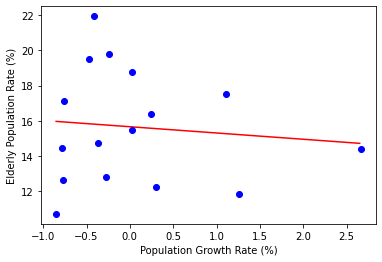

In [15]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import random

X = [0.3, -0.78, 1.26, 0.03, 1.11, 0.24, -0.24, -0.47, -0.77, -0.37, -0.85, -0.41, -0.27, 0.02, -0.76, 2.66]
Y = [12.27, 14.44, 11.87, 18.75, 17.52, 16.37, 19.78, 19.51, 12.65, 14.74, 10.72, 21.94, 12.83, 15.51, 17.14, 14.42]

# a와 b를 랜덤한 값으로 초기화 합니다.
a = tf.Variable(random.random())
b = tf.Variable(random.random())

# 잔차의 제곱의 평균을 반환하는 함수입니다.
def compute_loss():
    y_pred = a * X + b
    loss = tf.reduce_mean((Y - y_pred) ** 2)
    return loss

optimizer = tf.optimizers.Adam(lr=0.07)
for i in range(1000):
    # 잔차의 제곱의 평균을 최소화(minimize) 합니다.
    optimizer.minimize(compute_loss, var_list=[a, b])
    
    if i % 100 == 99:
        print(i, 'a:', a.numpy(), 'b:', b.numpy(), 'loss:', compute_loss().numpy())
    
line_x = np.arange(min(X), max(X), 0.01)
line_y = a * line_x + b

# 그래프를 그립니다
plt.plot(line_x, line_y, 'r-')
plt.plot(X, Y, 'bo')
plt.xlabel('Population Growth Rate (%)')
plt.ylabel('Elderly Population Rate (%)')
plt.show()

99 a: 3.8409429 	b: -5.2558312 	c: 6.227044 	loss: 71.785736
199 a: 2.85325 	b: -4.787653 	c: 10.161952 	loss: 32.598125
299 a: 1.3808681 	b: -2.563425 	c: 12.8064785 	loss: 16.64794
399 a: 0.39463478 	b: -1.0227787 	c: 14.475366 	loss: 11.204802
499 a: -0.14651175 	b: -0.17706713 	c: 15.391015 	loss: 9.788471
599 a: -0.4036242 	b: 0.22470228 	c: 15.82624 	loss: 9.505398
699 a: -0.5099715 	b: 0.39087877 	c: 16.006271 	loss: 9.461792
799 a: -0.54832673 	b: 0.45081207 	c: 16.071201 	loss: 9.456616
899 a: -0.5603793 	b: 0.46964595 	c: 16.091602 	loss: 9.456146
999 a: -0.5636699 	b: 0.47478777 	c: 16.097174 	loss: 9.456112


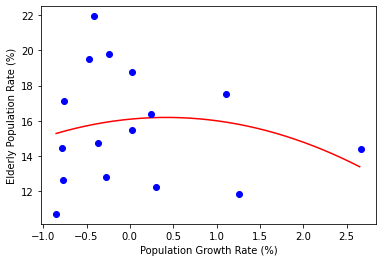

In [93]:
X = [0.3, -0.78, 1.26, 0.03, 1.11, 0.24, -0.24, -0.47, -0.77, -0.37, -0.85, -0.41, -0.27, 0.02, -0.76, 2.66]
Y = [12.27, 14.44, 11.87, 18.75, 17.52, 16.37, 19.78, 19.51, 12.65, 14.74, 10.72, 21.94, 12.83, 15.51, 17.14, 14.42]

# a와 b를 랜덤한 값으로 초기화 합니다.
a = tf.Variable(random.random())
b = tf.Variable(random.random())
c = tf.Variable(random.random())

# 잔차의 제곱의 평균을 반환하는 함수입니다.
def compute_loss():
    y_pred = a * X*X + b * X + c
    loss = tf.reduce_mean((Y - y_pred) ** 2)
    return loss

optimizer = tf.optimizers.Adam(lr=0.07)
for i in range(1000):
    # 잔차의 제곱의 평균을 최소화(minimize) 합니다.
    optimizer.minimize(compute_loss, var_list=[a, b, c])
    
    if i % 100 == 99:
        print(i, 'a:', a.numpy(), '\tb:', b.numpy(), '\tc:', c.numpy(), '\tloss:', compute_loss().numpy())
    
line_x = np.arange(min(X), max(X), 0.01)
line_y = a * line_x * line_x + b * line_x + c


# 그래프를 그립니다
plt.plot(line_x, line_y, 'r-')
plt.plot(X, Y, 'bo')
plt.xlabel('Population Growth Rate (%)')
plt.ylabel('Elderly Population Rate (%)')
plt.show()

99 	a: -1.3354062 	b: 6.2202735 	c: -3.6490371 	d: 6.5044794 	loss: 60.839073
199 	a: -1.9949726 	b: 6.8779483 	c: -2.3698287 	d: 10.005087 	loss: 30.442703
299 	a: -1.6079754 	b: 4.9581866 	c: -0.9813935 	d: 12.170429 	loss: 19.70143
399 	a: -0.85756 	b: 2.5746098 	c: -0.54612345 	d: 13.711974 	loss: 13.843117
499 	a: -0.14738391 	b: 0.4932369 	c: -0.44156483 	d: 14.858564 	loss: 10.638294
599 	a: 0.4017138 	b: -1.0887622 	c: -0.4084358 	d: 15.694892 	loss: 9.070614
699 	a: 0.78662395 	b: -2.1941135 	c: -0.39142102 	d: 16.274149 	loss: 8.390906
799 	a: 1.0379277 	b: -2.9153612 	c: -0.38102117 	d: 16.65143 	loss: 8.129332
899 	a: 1.1917001 	b: -3.3566358 	c: -0.37474614 	d: 16.88216 	loss: 8.03996
999 	a: 1.2799935 	b: -3.6100001 	c: -0.3711561 	d: 17.014624 	loss: 8.0128765


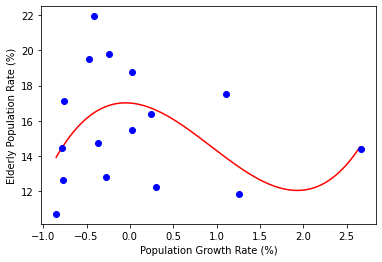

In [127]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import random

X = [0.3, -0.78, 1.26, 0.03, 1.11, 0.24, -0.24, -0.47, -0.77, -0.37, -0.85, -0.41, -0.27, 0.02, -0.76, 2.66]
Y = [12.27, 14.44, 11.87, 18.75, 17.52, 16.37, 19.78, 19.51, 12.65, 14.74, 10.72, 21.94, 12.83, 15.51, 17.14, 14.42]

# a와 b를 랜덤한 값으로 초기화 합니다.
a = tf.Variable(random.random())
b = tf.Variable(random.random())
c = tf.Variable(random.random())
d = tf.Variable(random.random())

# 잔차의 제곱의 평균을 반환하는 함수입니다.
def compute_loss():
    y_pred = a * X*X*X + b * X*X + c * X + d
    loss = tf.reduce_mean((Y - y_pred) ** 2)
    return loss

optimizer = tf.optimizers.Adam(lr=0.07)
for i in range(1000):
    # 잔차의 제곱의 평균을 최소화(minimize) 합니다.
    optimizer.minimize(compute_loss, var_list=[a, b, c, d])
    
    if i % 100 == 99:
        print(i, '\ta:', a.numpy(), '\tb:', b.numpy(), '\tc:', c.numpy(), '\td:', d.numpy(), '\tloss:', compute_loss().numpy())
    
line_x = np.arange(min(X), max(X), 0.01)
line_y = a * line_x * line_x * line_x + b * line_x * line_x + c * line_x + d


# 그래프를 그립니다
plt.plot(line_x, line_y, 'r-')
plt.plot(X, Y, 'bo')
plt.xlabel('Population Growth Rate (%)')
plt.ylabel('Elderly Population Rate (%)')
plt.show()

#### 딥러닝을 이용

In [112]:
import tensorflow as tf
import numpy as np

X = [0.3, -0.78, 1.26, 0.03, 1.11, 0.24, -0.24, -0.47, -0.77, -0.37, -0.85, -0.41, -0.27, 0.02, -0.76, 2.66]
Y = [12.27, 14.44, 11.87, 18.75, 17.52, 16.37, 19.78, 19.51, 12.65, 14.74, 10.72, 21.94, 12.83, 15.51, 17.14, 14.42]

model = tf.keras.Sequential([
    tf.keras.layers.Dense(units=6, activation='tanh', input_shape=(1, )),
    tf.keras.layers.Dense(units=1)
])

model.compile(optimizer=tf.keras.optimizers.SGD(lr=0.1), loss='mse')

model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 6)                 12        
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 7         
Total params: 19
Trainable params: 19
Non-trainable params: 0
_________________________________________________________________


In [113]:
model.fit(X, Y, epochs=10)

Train on 16 samples
Epoch 1/10
16/16 [==============================] - 0s 13ms/sample - loss: 255.8180
Epoch 2/10
16/16 [==============================] - 0s 574us/sample - loss: 143.5404
Epoch 3/10
16/16 [==============================] - 0s 620us/sample - loss: 23.3651
Epoch 4/10
16/16 [==============================] - 0s 499us/sample - loss: 9.8562
Epoch 5/10
16/16 [==============================] - 0s 555us/sample - loss: 9.8033
Epoch 6/10
16/16 [==============================] - 0s 559us/sample - loss: 9.7529
Epoch 7/10
16/16 [==============================] - 0s 437us/sample - loss: 9.7082
Epoch 8/10
16/16 [==============================] - 0s 495us/sample - loss: 9.6739
Epoch 9/10
16/16 [==============================] - 0s 499us/sample - loss: 9.6516
Epoch 10/10
16/16 [==============================] - 0s 559us/sample - loss: 9.6380


In [114]:
model.predict(X)

array([[15.728788 ],
       [15.8053875],
       [15.34619  ],
       [15.781721 ],
       [15.427518 ],
       [15.742507 ],
       [15.812254 ],
       [15.820598 ],
       [15.806368 ],
       [15.818984 ],
       [15.797583 ],
       [15.8200035],
       [15.814269 ],
       [15.78325  ],
       [15.807315 ],
       [14.134102 ]], dtype=float32)

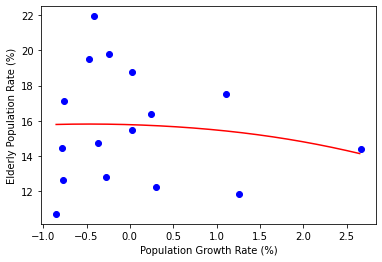

In [115]:
import matplotlib.pyplot as plt

line_x = np.arange(min(X), max(X), 0.01)
line_y = model.predict(line_x)

plt.plot(line_x, line_y, 'r-')
plt.plot(X, Y, 'bo')
plt.xlabel('Population Growth Rate (%)')
plt.ylabel('Elderly Population Rate (%)')
plt.show()